In [12]:
import pandas as pd
import plotly.express as px

In [58]:
data = pd.read_csv("data.csv", sep=";", parse_dates=["REPORTDATE"], infer_datetime_format=True)

In [59]:
data.head()

,REPORTDATE,VALUE
0,2013-12-30,3457625638
1,2013-12-31,3417092149
2,2014-01-01,3417092149
3,2014-01-02,3417092149
4,2014-01-03,3417092149


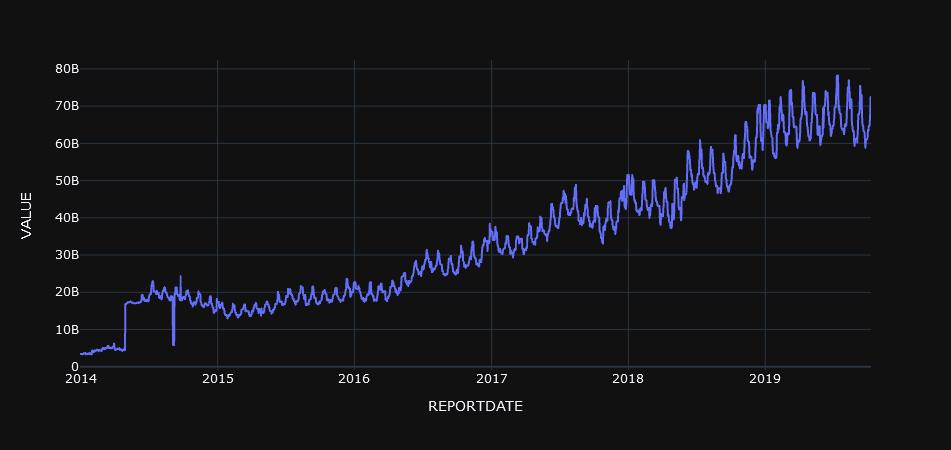

In [22]:
fig = px.line(data, x="REPORTDATE", y="VALUE", template="plotly_dark")
fig.show()

In [60]:
#!g2.mig
%pip install etna

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 210 kB 1.6 MB/s            
     |████████████████████████████████| 1.5 MB 14.3 MB/s            
     |████████████████████████████████| 3.4 MB 79.8 MB/s            
     |████████████████████████████████| 355 kB 80.1 MB/s            
     |████████████████████████████████| 292 kB 83.2 MB/s            
     |████████████████████████████████| 172 kB 74.7 MB/s            
     |████████████████████████████████| 995 kB 81.6 MB/s            
     |████████████████████████████████| 57 kB 6.6 MB/s             
     |████████████████████████████████| 43 kB 2.6 MB/s             
     |████████████████████████████████| 127 kB 100.5 MB/s            
     |████████████████████████████████| 47 kB 6.4 MB/s             
     |████████████████████████████████| 116 kB 94.3 MB/s            
     |████████████████████████████████| 780 kB 67.4 MB/s            
     |██████████████████████

In [64]:
#!g2.mig
%pip install etna[prophet]

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 8.9 MB 1.9 MB/s            
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Using cached ipython-7.13.0-py3-none-any.whl (780 kB)
  Using cached ipykernel-5.1.4-py3-none-any.whl (116 kB)
     |████████████████████████████████| 73 kB 3.3 MB/s             
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
     |████████████████████████████████| 45 kB 5.1 MB/s             
     |████████████████████████████████| 1.8 MB 72.6 MB/s            
  Using cached notebook-6.1.1-py3-none-any.whl (9.4 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider addin

In [65]:
#!g2.mig
from etna.datasets import TSDataset

In [67]:
#!g2.mig
data = data.rename(columns={"REPORTDATE": "timestamp"})

In [69]:
#!g2.mig
data = data.rename(columns={"VALUE": "target"})

In [70]:
#!g2.mig
data["segment"] = "main"

In [71]:
#!g2.mig
data.head()

,timestamp,target,segment
0,2013-12-30,3457625638,main
1,2013-12-31,3417092149,main
2,2014-01-01,3417092149,main
3,2014-01-02,3417092149,main
4,2014-01-03,3417092149,main


In [89]:
#!c1.32
df = TSDataset.to_dataset(data)
ts = TSDataset(df, freq="D")

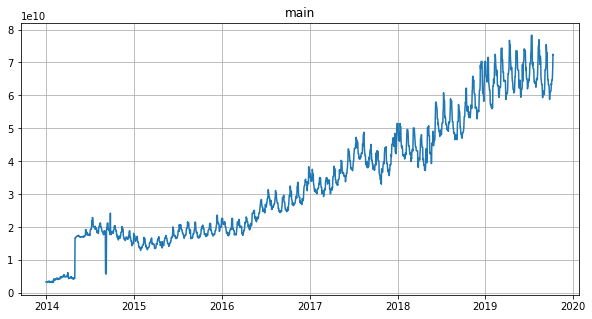

In [90]:
#!c1.32
ts.plot()

In [91]:
#!c1.32
ts.describe()

,start_timestamp,end_timestamp,length,num_missing,num_segments,num_exogs,num_regressors,num_known_future,freq
segments,,,,,,,,,
main,2013-12-30,2019-10-10,2111,0,1,0,0,0,D


In [102]:
#!c1.32
train_ts, test_ts = ts.train_test_split(
    train_start = '2013-12-30',
    train_end = '2017-12-31',
    test_start = '2018-01-01',
    test_end = '2019-10-10'
)

In [103]:
#!c1.32
test_ts.describe()

,start_timestamp,end_timestamp,length,num_missing,num_segments,num_exogs,num_regressors,num_known_future,freq
segments,,,,,,,,,
main,2018-01-01,2019-10-10,648,0,1,0,0,0,D


In [114]:
#!c1.32
horizon = 648
from etna.models import MovingAverageModel

#Fit the model
model = MovingAverageModel()
model.fit(train_ts)

#Make the forecast
future_ts = train_ts.make_future(horizon)
forecast_ts = model.forecast(future_ts)

/home/jupyter/.local/lib/python3.8/site-packages/etna/datasets/tsdataset.py:289: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(


In [115]:
#!c1.32
from etna.metrics import MSLE
msle = MSLE()
msle(y_true=test_ts, y_pred=forecast_ts)

{'main': 0.04310460375542488}

In [116]:
#!c1.32
from etna.models import NaiveModel

#Fit the model
model = NaiveModel()
model.fit(train_ts)

#Make the forecast
future_ts = train_ts.make_future(horizon)
forecast_ts = model.forecast(future_ts)

/home/jupyter/.local/lib/python3.8/site-packages/etna/datasets/tsdataset.py:289: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(


In [117]:
#!c1.32
msle(y_true=test_ts, y_pred=forecast_ts)

{'main': 0.04051483558566005}

In [ ]:
#!c1.32
